## Student Details

When submitting, fill your name and ID in this cell. Note that this is a markdown cell.



In [1]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

#Array processing
import numpy as np
#Data analysis, wrangling and common exploratory operations
import pandas as pd
from pandas import Series, DataFrame

#For visualization. Matplotlib for basic viz and seaborn for more stylish figures
import matplotlib.pyplot as plt
# import seaborn as sns
import seaborn as sns
#For some of the date operations
#import datetime
import datetime

In [2]:
#read the csv file into a Pandas data frame
df_census = pd.read_csv('census1994.csv')

#return the first 5 rows of the dataset
print("First 5 rows of the dataset",'\n\n',df_census.head(),'\n\n')

#return the last 5 rows of the dataset
print("Last 5 rows of the dataset",'\n\n',df_census.tail(),'\n\n')

First 5 rows of the dataset 

         Date  Age          WorkClass  fnlwgt   education  education-num  \
0  3/20/1994   39          State-gov   77516   Bachelors             13   
1  1/14/1994   50   Self-emp-not-inc   83311   Bachelors             13   
2  8/14/1994   38            Private  215646     HS-grad              9   
3  3/17/1994   53            Private  234721        11th              7   
4  9/20/1994   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race   gender  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-we

In [3]:
#cleaning the dataset
data = df_census[df_census['native-country']!=' ?']
data1 = data[data['WorkClass']!=' ?']
df = data1[data1['occupation']!=' ?']
print(df.shape)

(30162, 16)


In [4]:
# print the column names
df.columns

Index(['Date', 'Age', 'WorkClass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'class'],
      dtype='object')

In [5]:
x=df[['Age']].values
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y=le.fit_transform(df['class'])
print(x.shape)
print(y.shape)

(30162, 1)
(30162,)


In [6]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [7]:
xTrain.shape,xTest.shape,yTrain.shape,yTest.shape

((21113, 1), (9049, 1), (21113,), (9049,))

In [14]:
import random
# random list for K-value
a=[]
ran = range(5)
for j in ran:
    a.append(random.randint(1,20))
print('Randomised list is: ',a)

Randomised list is:  [6, 20, 13, 12, 12]


In [15]:
# applying KNN with euclidean and finding accuracy score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
scores={}
scores_list=[]
for k in a:
    knn = KNeighborsClassifier(n_neighbors = k, algorithm='auto', metric='euclidean')
    knn.fit(xTrain, yTrain) 
    y_pred = knn.predict(xTest)
    # Generate Confusion Matrix
    cm_knn = confusion_matrix(yTest, y_pred)

    # Generate Classification Report
    cr_knn = classification_report(yTest, y_pred)
    print ("Accuracy is ", accuracy_score(yTest,y_pred)*100,"% for K-Value:",k)
    print("\n Confusion matrix\n",cm_knn)
    print("\n Classification Report\n",cr_knn)
    scores[k] = accuracy_score(yTest,y_pred)*100
    scores_list.append(accuracy_score(yTest,y_pred)*100)

Accuracy is  72.60470770250856 % for K-Value: 6

 Confusion matrix
 [[6272  492]
 [1987  298]]

 Classification Report
               precision    recall  f1-score   support

           0       0.76      0.93      0.83      6764
           1       0.38      0.13      0.19      2285

    accuracy                           0.73      9049
   macro avg       0.57      0.53      0.51      9049
weighted avg       0.66      0.73      0.67      9049

Accuracy is  73.66559840866394 % for K-Value: 20

 Confusion matrix
 [[6488  276]
 [2107  178]]

 Classification Report
               precision    recall  f1-score   support

           0       0.75      0.96      0.84      6764
           1       0.39      0.08      0.13      2285

    accuracy                           0.74      9049
   macro avg       0.57      0.52      0.49      9049
weighted avg       0.66      0.74      0.66      9049

Accuracy is  71.99690573544038 % for K-Value: 13

 Confusion matrix
 [[6090  674]
 [1860  425]]

 Classif

([<matplotlib.axis.XTick at 0x21fe44c2860>,
 <a list of 5 Text xticklabel objects>)

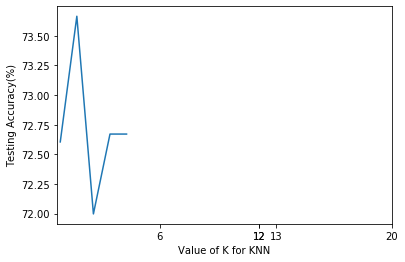

In [16]:
# visualization of KNN
plt.plot(ran,scores_list)
plt.xlabel("Value of K for KNN")
plt.ylabel("Testing Accuracy(%)")
plt.xticks(a)